## BUS 888 - C Kaligotla
### Scikit Learn Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import yfinance as yf


In [2]:
# Parameters
verbose = True

# Fetch historical market data from Yahoo Finance
df = yf.download('AAPL', start='2023-05-01', end='2023-05-31', progress=False)
df_next = yf.download('AAPL', start='2023-06-01', end='2023-06-02', progress=False)

if verbose:
    output = df.head(5).to_string(index=False)
    print(output)

# Use only 'Close' and convert the dataframe to numpy array
X = np.arange(1, len(df) + 1).reshape(-1, 1)
y = np.array(df['Close'])

if verbose:
    print(X)
    print(y)


      Open       High        Low      Close  Adj Close    Volume
169.279999 170.449997 168.639999 169.589996 168.461105  52472900
170.089996 170.350006 167.539993 168.539993 167.418076  48425700
169.500000 170.919998 167.160004 167.449997 166.335358  65136000
164.889999 167.039993 164.309998 165.789993 164.686401  81235400
170.979996 174.300003 170.759995 173.570007 172.414612 113316400
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]]
[169.58999634 168.53999329 167.44999695 165.78999329 173.57000732
 173.5        171.77000427 173.55999756 173.75       172.57000732
 172.07000732 172.07000732 172.69000244 175.05000305 175.16000366
 174.19999695 171.55999756 171.83999634 172.99000549 175.42999268
 177.30000305]


In [3]:
# Create a linear regression model and fit the data, get the slope and intercept
model = LinearRegression()
model.fit(X, y)
slope = model.coef_[0]
intercept = model.intercept_

In [4]:
# Predict the output for a new input based on the regression line
X_pred = np.array([[len(df)+1]])  # Reshape X_pred as a 2D array
y_pred = model.predict(X_pred)
y_pred_by_line = intercept + slope * X_pred


In [5]:
# Get the actual next data point
X_next = [[len(df)+1]]
y_next = df_next['Close'][0]

print("Prediction for", X_pred[0][0], "is:", y_pred[0],". Using a line, we get: ", y_pred_by_line)
print("Actual value for", X_next[0][0], "is:", y_next)

Prediction for 22 is: 175.72566862560453 . Using a line, we get:  [[175.72566863]]
Actual value for 22 is: 180.08999633789062


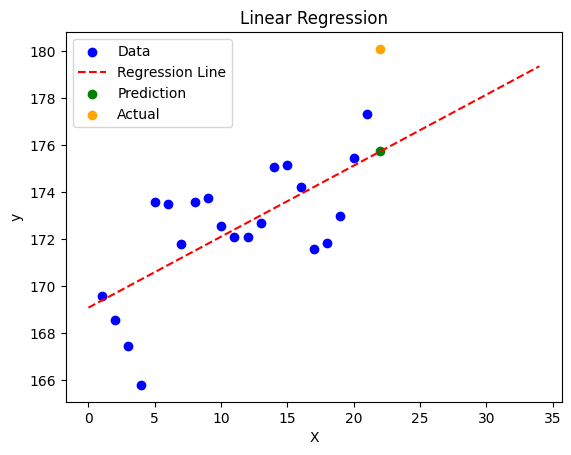

In [6]:
# Plot the data and regression line
X_range = np.arange(0, 35).reshape(-1, 1)
y_range = intercept + slope * X_range

plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_range, y_range, color='red', linestyle='--', label='Regression Line')
plt.scatter(X_pred, y_pred, color='green', label='Prediction')
plt.scatter(X_next, y_next, color='orange', label='Actual')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()
